In [7]:
import zipfile
from PIL import Image
from io import BytesIO
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
class ZipImageDataset(Dataset):
    def __init__(self, zip_path, transform=None):
        self.zip_path = zip_path
        self.transform = transform
        self.zfile = zipfile.ZipFile(zip_path, 'r')

        # Liste des fichiers image avec leurs labels
        self.image_files = [f for f in self.zfile.namelist() if f.lower().endswith(('.jpg', '.png'))]

        # Extraire les labels depuis les noms de dossier
        self.classes = [os.path.dirname(f).split('/')[-1] for f in self.image_files]
        classes = sorted(set(self.classes))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
    
    def __len__(self):
        return len(self.image_files)

    def get_sample(self, sample_size, selected_class):
        classes = np.array(self.classes)
        indexes = np.where(classes == selected_class)[0]
        indexes = np.random.choice(indexes,sample_size)
        images = [self.__getitem__(idx)[0] for idx in indexes]
        return dict(zip(indexes,images))
    
        
    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label_name = os.path.dirname(image_path).split('/')[-1]
        label = self.class_to_idx[label_name]

        # Charger l'image directement depuis le zip
        with self.zfile.open(image_path) as img_file:
            image = Image.open(BytesIO(img_file.read())).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

In [117]:
dataloader = ZipImageDataset("../data/BHI.zip")

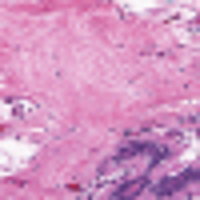

In [79]:
dataloader[0][0].resize((200,200))

# Analyse 

## Nombre d'images

In [80]:
nb_images = len(dataloader)
nb_images

555048

## Targets

In [81]:
targets = dataloader.classes

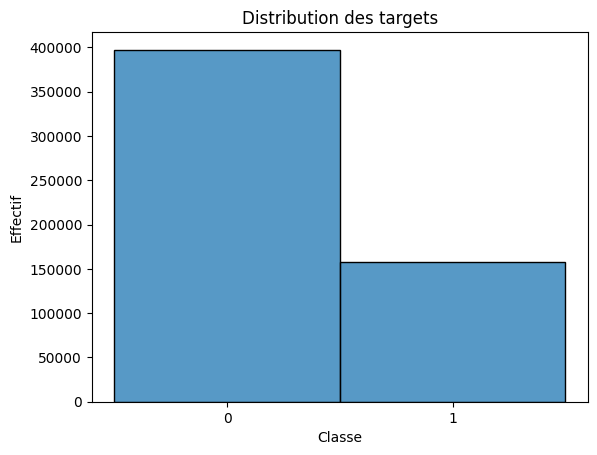

In [82]:
g = sns.histplot(targets,discrete=True)
g.set_xlabel("Classe")
g.set_ylabel("Effectif")
g.set_title("Distribution des targets");

In [118]:
sample

{np.int64(142718): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(419751): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(126220): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(340553): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(438919): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(193692): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(309517): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(103742): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(529001): <PIL.Image.Image image mode=RGB size=50x50>,
 np.int64(316044): <PIL.Image.Image image mode=RGB size=50x50>}

In [231]:
def plot_sample(samples, selected_class):
    sample = dataloader.get_sample(samples,selected_class)
    figure,ax = plt.subplots(1,samples, figsize=(samples,2))
    i = 0
    for key, img in sample.items():
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(f"{key}")
        i+=1
    
    plt.suptitle(f"Echantillon de la classe {selected_class}")
    return sample  

In [264]:
def get_specter(img):
    img_array = np.array(img)   
    red_channel   = img_array[:, :, 0].reshape(-1)
    green_channel = img_array[:, :, 1].reshape(-1)
    blue_channel  = img_array[:, :, 2].reshape(-1)
    
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(red_channel, color="red", fill=True)
    sns.kdeplot(green_channel, color="green", fill=True)
    g = sns.kdeplot(blue_channel, color="blue", fill=True)
    g.set_ylim(0,1)
    g.set_ylabel("Intensité");

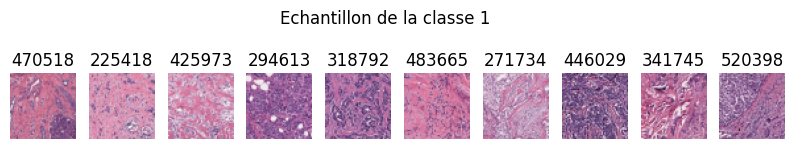

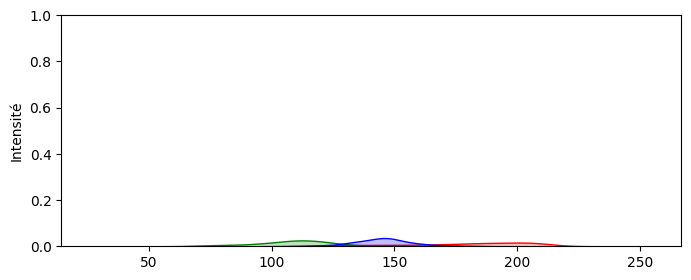

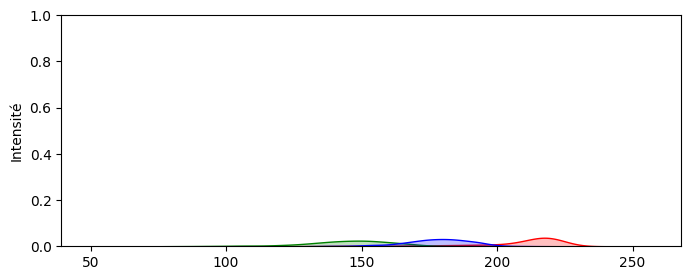

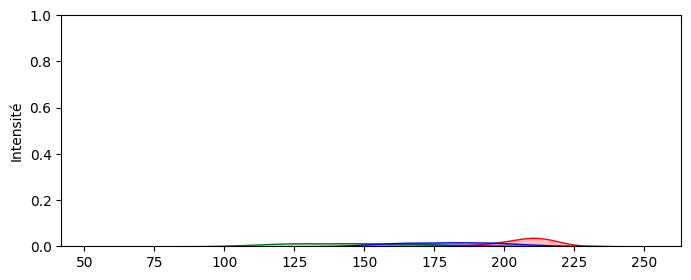

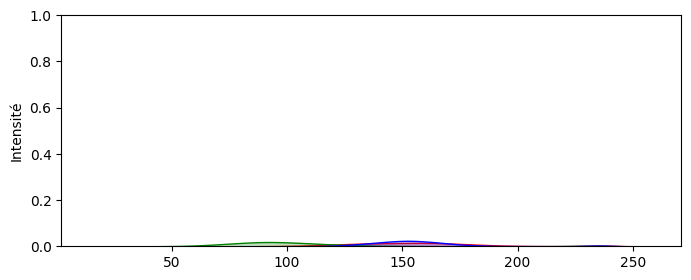

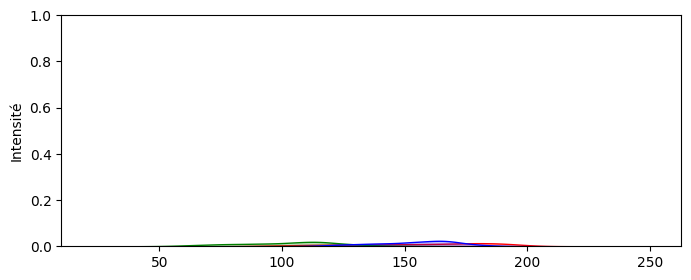

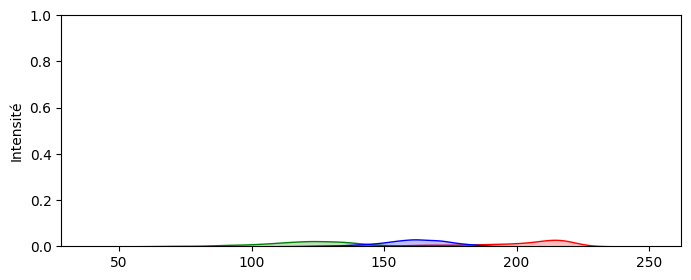

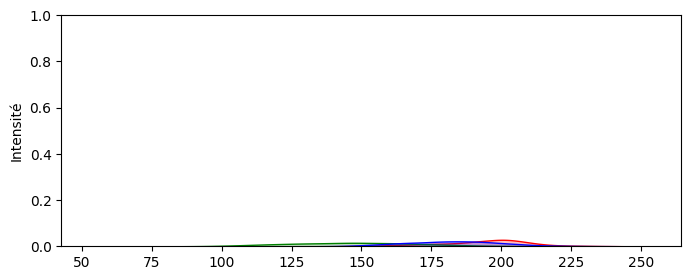

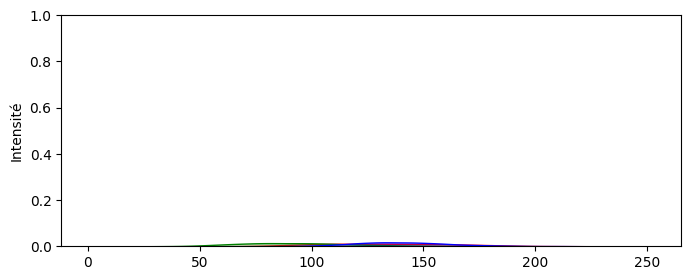

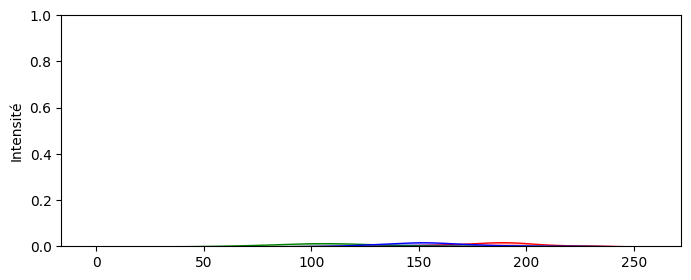

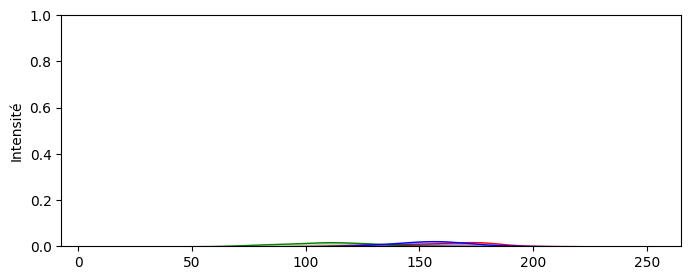

In [265]:
sample =  plot_sample(10, "1")
for key, img in sample.items():
     get_specter(img)

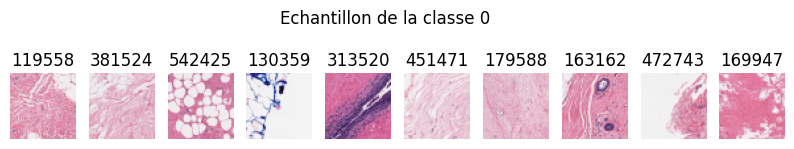

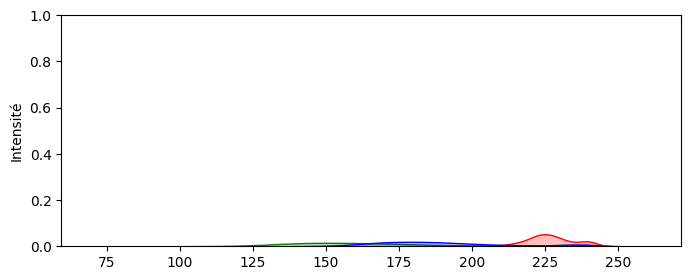

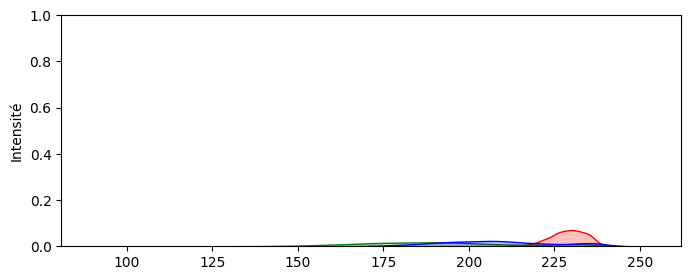

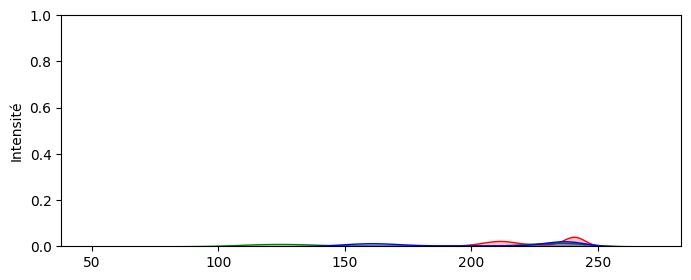

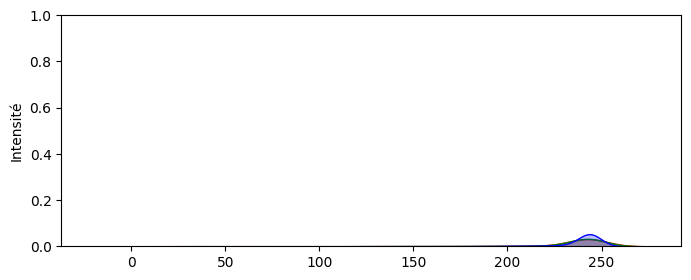

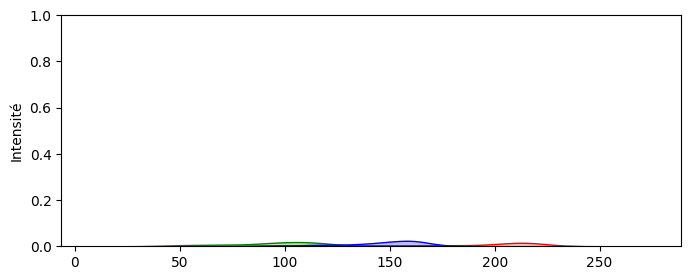

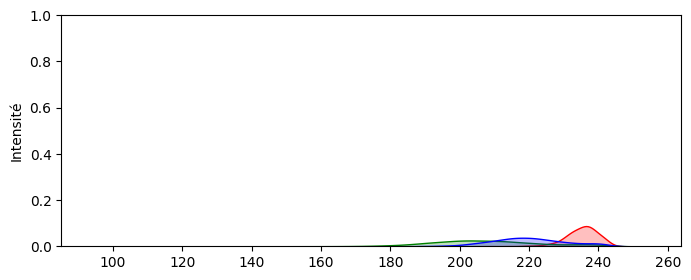

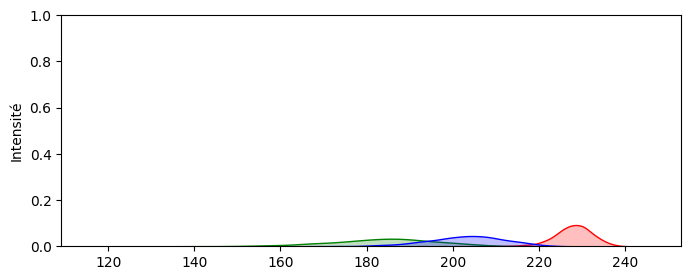

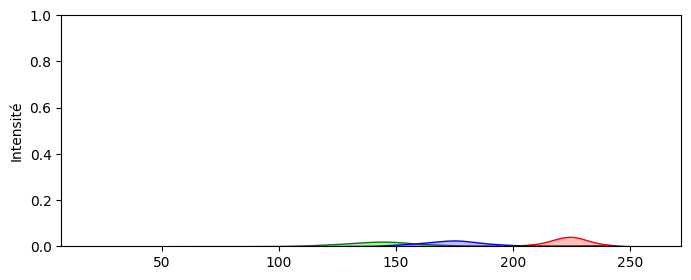

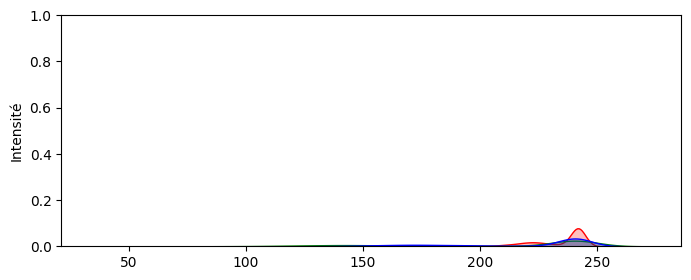

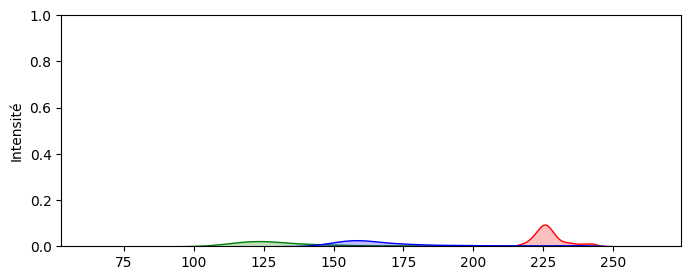

In [267]:
sample =  plot_sample(10, "0")
for key, img in sample.items():
     get_specter(img)

In [268]:
def get_mean_specter(img):
    img_array = np.array(img)   
    red_channel   = img_array[:, :, 0].mean()
    green_channel = img_array[:, :, 1].mean()
    blue_channel  = img_array[:, :, 2].mean()
    fig = plt.figure(figsize=(8,3))
    plt.axvline(red_channel, 0,1,c="red")
    plt.axvline(green_channel, 0,1,c="green")
    plt.axvline(blue_channel, 0,1,c="blue")
    ax = plt.gca()
    ax.set_xlabel("Intensité moyenne");
    ax.set_xlim(0,255)

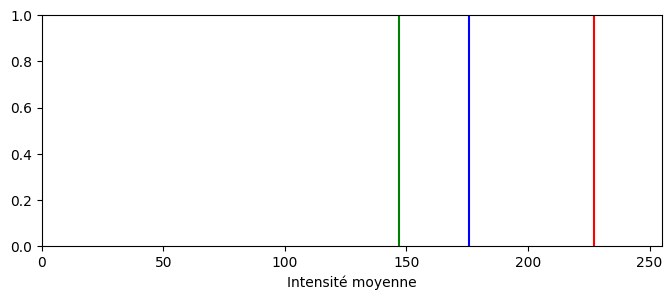

In [269]:
get_mean_specter(img)